# **Cloning and Building Darknet**

In this part, we do the following tasks:

*   cloning darknet repo
*   changing makefile to have GPU and OPENCV enabled
*   build darknet

After the above tasks, we have config file for YOLO in the **cfg/** subdirectory.

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15069, done.
remote: Total 15069 (delta 0), reused 0 (delta 0), pack-reused 15069
Receiving objects: 100% (15069/15069), 13.44 MiB | 17.85 MiB/s, done.
Resolving deltas: 100% (10244/10244), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
#!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
#!sed -i 's/GPU=0/GPU=1/' Makefile
#!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
# build darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:875:33: warning: c

#**Get the PASCAL VOC data**

Here we get all of the VOC data from 2007 to 2012. Then, we exctract the **.tar** files, so that we have **VOCdevkit/** subdirectory with all the VOC training data in it. 

In [5]:
%cd ..

/content


In [6]:
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar

--2021-06-07 06:31:34--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  5.58MB/s    in 5m 1s   

2021-06-07 06:36:38 (6.34 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]

--2021-06-07 06:36:38--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

VOCtrainval_06-Nov- 100%[===================>] 438.72M  2.29MB/s    in 68s     

2021-06-07 06:37:47 (6.44 MB

In [7]:
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

## Generate labels for VOC

Then we generate the label files that Darknet uses. Darknet wants a **.txt** file for each image with a line for each ground truth object in the image that looks like: 

`<object-class> <x> <y> <width> <height>**`

where x, y, width, and height are relative to the image's width and height. To generate these file we run the **voc_label.py** script.


In [8]:
!wget https://pjreddie.com/media/files/voc_label.py

--2021-06-07 06:41:27--  https://pjreddie.com/media/files/voc_label.py
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2042 (2.0K) [application/octet-stream]
Saving to: ‘voc_label.py’

voc_label.py        100%[===================>]   1.99K  --.-KB/s    in 0s      

2021-06-07 06:41:29 (401 MB/s) - ‘voc_label.py’ saved [2042/2042]



In [9]:
%run voc_label.py

# **Import trained weights**

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [11]:
%cp /content/gdrive/MyDrive/trained_weights.zip /content/

In [12]:
!unzip trained_weights.zip

Archive:  trained_weights.zip
   creating: trained_weights/
  inflating: trained_weights/yolov3-voc_1000.weights  
  inflating: trained_weights/yolov3-voc_2000.weights  
  inflating: trained_weights/yolov3-voc_3000.weights  
  inflating: trained_weights/yolov3-voc_4000.weights  
  inflating: trained_weights/yolov3-voc_final.weights  
  inflating: trained_weights/yolov3-voc_last.weights  


In [13]:
%cp trained_weights/* /content/darknet/backup/

# **Performance Evalutation of Darknet on Test Dataset**

In [14]:
import glob
import random
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

def getAllAnnotations():
  return glob.glob("/content/VOCdevkit/VOC2007/Annotations/*.xml")


def parseXML(xmlfile):
  
    # create element tree object
    tree = ET.parse(xmlfile)
  
    # get root element
    root = tree.getroot()
  
    # create empty list for news items
    objitems = []
  
    # iterate news items
    for item in root.findall('./object'):
  
    
        # iterate child elements of item
        for child in item:
          if child.tag == 'name':
            objitems.append(child.text)

    data = {}
    data["filename"] = root.find("filename").text
    data["objects"] = objitems
    
    return data

def extractFileNameandObjectsNames():
    extractedInfo = []
    xmlFiles = getAllAnnotations()
    for item in xmlFiles:
      extractedInfo.append(parseXML(item))

    return extractedInfo

#fileName must be in string format like 009066.jpg
#ths must be in string format like 0.3 and its must be one of them ["0.1","0.2","0.3","0.4","0.5""0.6","0.7","0.8","0.9"]
def getObjListFromDarknet(fileName, ths):
  objInImageList = []

  imagePath = "/content/VOCdevkit/VOC2007/JPEGImages/" + fileName
  thss = " " + ths

  darknetOut = subprocess.run(["./darknet", "detector", "test", "cfg/voc.data", "cfg/yolov3-voc.cfg", "backup/yolov3-voc_last.weights", imagePath, "-thresh", thss], capture_output=True)

  for item in (darknetOut.stdout).decode("utf-8").split("milli-seconds.")[1].split("\n"):
    if item != "":
      objInImageList.append(item.split(":")[0])

  return objInImageList


In [15]:
# This function randomly selects images from dataset and increase on numberOfTestSample will result in long execution time due to running darknet for every image with different threshold values
numberOfTestSample = 20
imageObjInfo = random.sample(extractFileNameandObjectsNames(), numberOfTestSample)

# Number of different threshold levels will increase exectuion time due to running darknet
thsLevel = ["0.1","0.3","0.5","0.7","0.9"]

In [19]:
%cd darknet/

/content/darknet


In [20]:
testResult = []

for ths in thsLevel:
  for testImage in imageObjInfo:
    darknetObjs = getObjListFromDarknet(testImage["filename"], ths)

    actualNumberOfObject = len(testImage['objects'])
    darknetFoundNumberOfObject = len(darknetObjs)
    isAllObjectsFound = 0
    if set(testImage['objects']) == set(darknetObjs):
      isAllObjectsFound = 1

    ret = {}
    ret["filename"] = testImage["filename"]
    ret["threshold"] = ths
    ret["actualNumberObject"] = actualNumberOfObject
    ret["darknetFoundNumberObject"] = darknetFoundNumberOfObject
    ret["isAllObjectsFound"] = isAllObjectsFound
    testResult.append(ret)

testResultPD = pd.DataFrame(testResult)
del(testResult)

In [25]:
testResultPD.head(5)

,filename,threshold,actualNumberObject,darknetFoundNumberObject,isAllObjectsFound
0,003227.jpg,0.1,1,1,1
1,002965.jpg,0.1,26,26,1
2,009864.jpg,0.1,1,4,0
3,004550.jpg,0.1,1,1,1
4,006272.jpg,0.1,2,3,0


In [24]:
testResultPD.loc[testResultPD['threshold'] == '0.1']

,filename,threshold,actualNumberObject,darknetFoundNumberObject,isAllObjectsFound
0,003227.jpg,0.1,1,1,1
1,002965.jpg,0.1,26,26,1
2,009864.jpg,0.1,1,4,0
3,004550.jpg,0.1,1,1,1
4,006272.jpg,0.1,2,3,0
5,009781.jpg,0.1,2,2,1
6,007003.jpg,0.1,5,2,0
7,006456.jpg,0.1,1,3,0
8,008520.jpg,0.1,8,9,0
9,005880.jpg,0.1,7,2,0


In [26]:
testResultPD.loc[testResultPD['threshold'] == '0.3']

,filename,threshold,actualNumberObject,darknetFoundNumberObject,isAllObjectsFound
20,003227.jpg,0.3,1,1,1
21,002965.jpg,0.3,26,19,1
22,009864.jpg,0.3,1,1,1
23,004550.jpg,0.3,1,1,1
24,006272.jpg,0.3,2,2,1
25,009781.jpg,0.3,2,2,1
26,007003.jpg,0.3,5,2,0
27,006456.jpg,0.3,1,2,0
28,008520.jpg,0.3,8,6,1
29,005880.jpg,0.3,7,1,0


In [27]:
testResultPD.loc[testResultPD['threshold'] == '0.5']

,filename,threshold,actualNumberObject,darknetFoundNumberObject,isAllObjectsFound
40,003227.jpg,0.5,1,1,1
41,002965.jpg,0.5,26,15,1
42,009864.jpg,0.5,1,1,1
43,004550.jpg,0.5,1,1,1
44,006272.jpg,0.5,2,2,1
45,009781.jpg,0.5,2,2,1
46,007003.jpg,0.5,5,1,0
47,006456.jpg,0.5,1,1,1
48,008520.jpg,0.5,8,5,1
49,005880.jpg,0.5,7,0,0


In [28]:
testResultPD.loc[testResultPD['threshold'] == '0.7']

,filename,threshold,actualNumberObject,darknetFoundNumberObject,isAllObjectsFound
60,003227.jpg,0.7,1,1,1
61,002965.jpg,0.7,26,12,1
62,009864.jpg,0.7,1,1,1
63,004550.jpg,0.7,1,1,1
64,006272.jpg,0.7,2,1,0
65,009781.jpg,0.7,2,2,1
66,007003.jpg,0.7,5,1,0
67,006456.jpg,0.7,1,1,1
68,008520.jpg,0.7,8,4,0
69,005880.jpg,0.7,7,0,0


In [29]:
testResultPD.loc[testResultPD['threshold'] == '0.9']

,filename,threshold,actualNumberObject,darknetFoundNumberObject,isAllObjectsFound
80,003227.jpg,0.9,1,1,1
81,002965.jpg,0.9,26,4,0
82,009864.jpg,0.9,1,1,1
83,004550.jpg,0.9,1,1,1
84,006272.jpg,0.9,2,1,0
85,009781.jpg,0.9,2,2,1
86,007003.jpg,0.9,5,1,0
87,006456.jpg,0.9,1,1,1
88,008520.jpg,0.9,8,3,0
89,005880.jpg,0.9,7,0,0


In [30]:
resultFigure = []

for item in testResultPD['threshold'].unique():
  numberOfTest = len(testResultPD.loc[testResultPD["threshold"] == item])
  testSuccessRate = ((testResultPD.loc[testResultPD["threshold"] == item]["isAllObjectsFound"].sum() / numberOfTest) * 100)
  testFailRate = 100 - testSuccessRate

  ret = {}
  ret["numberOfTest"] = numberOfTest
  ret["testSuccessRate"] = testSuccessRate
  ret["testFailRate"] = testFailRate
  ret["thsLevel"] = item
  resultFigure.append(ret)

resultFigurePD = pd.DataFrame(resultFigure)
del(resultFigure)

In [31]:
resultFigurePD

,numberOfTest,testSuccessRate,testFailRate,thsLevel
0,20,35.0,65.0,0.1
1,20,70.0,30.0,0.3
2,20,75.0,25.0,0.5
3,20,60.0,40.0,0.7
4,20,50.0,50.0,0.9


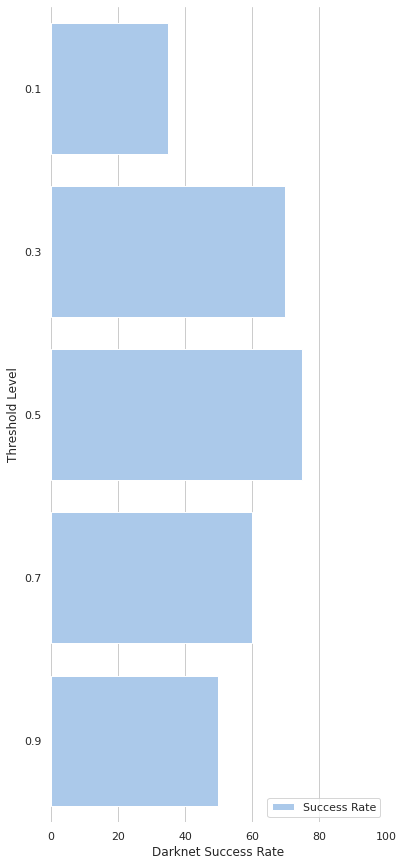

In [32]:
#Plotting ths vs success rate
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="testSuccessRate", y="thsLevel", data=resultFigurePD,
             label="Success Rate", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="Threshold Level",
       xlabel="Darknet Success Rate")
sns.despine(left=True, bottom=True)